In [1]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

Conducting hyperparameter search on alpha

epoch       0.000 | loss_total     1.37503 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.25007 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.34410 | train_AUC    0.50717 | train_MAE    0.99689 | valid_AUC     0.50111 | valid_MAE     1.00177 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.44367 | train_AUC    0.51510 | train_MAE    0.97279 | valid_AUC     0.51694 | valid_MAE     0.97556 | grad_wrt_mu     0.52100 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.15575 | train_AUC    0.53693 | train_MAE    0.96094 | valid_AUC     0.53457 | valid_MAE     0.96278 | grad_wrt_mu     0.

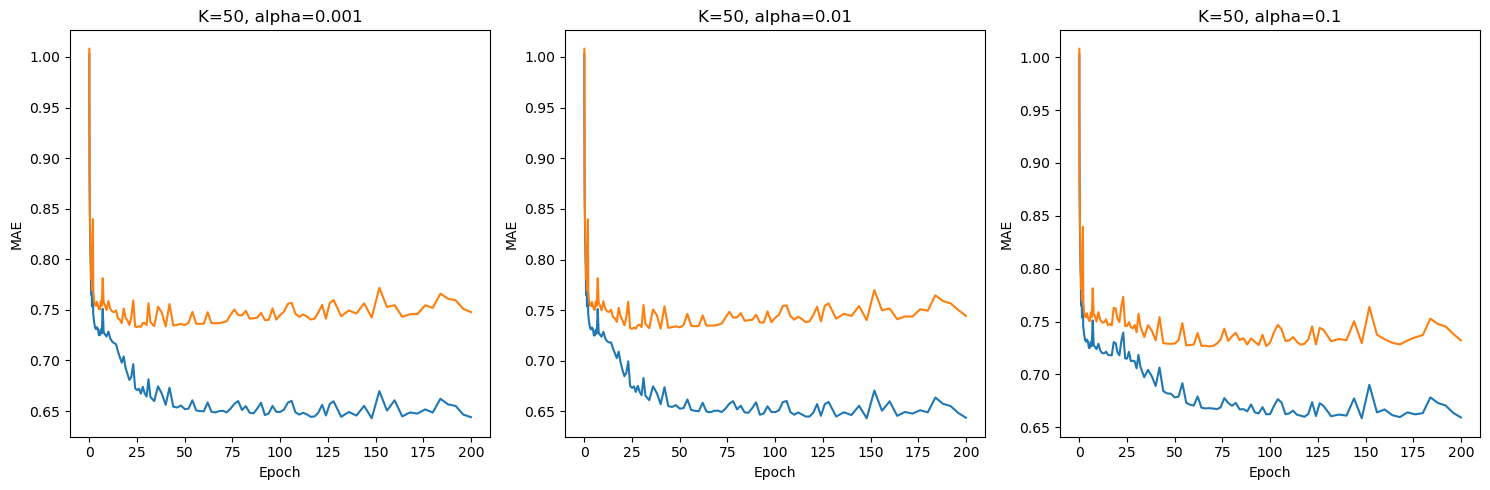

In [16]:

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.001, 0.01, 0.1]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=200, batch_size=1000, step_size=0.1, n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50, alpha={alpha}')

plt.tight_layout()
plt.show()

Plot the MAE score with the best setting found

epoch       0.000 | loss_total     1.56006 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.95200 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.014 | loss_total     1.42683 | train_AUC    0.63281 | train_MAE    0.99199 | valid_AUC     0.61651 | valid_MAE     0.99647 | grad_wrt_mu     0.90688 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.029 | loss_total     1.45332 | train_AUC    0.65425 | train_MAE    0.98188 | valid_AUC     0.64060 | valid_MAE     0.98549 | grad_wrt_mu     0.86868 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.043 | loss_total     1.35085 | train_AUC    0.67568 | train_MAE    0.97217 | valid_AUC     0.65982 | valid_MAE     0.97495 | grad_wrt_mu     0.

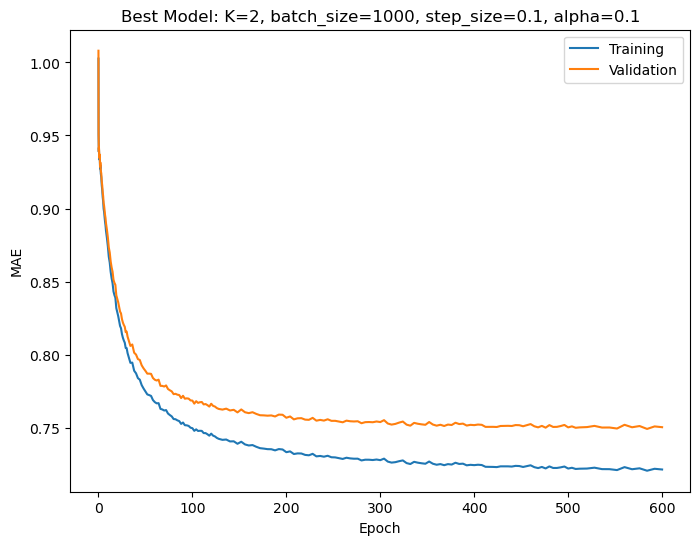

<Figure size 640x480 with 0 Axes>

In [18]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Create subplots for the trace plots

model = CollabFilterOneVectorPerItem(
    n_epochs=600, batch_size=1000, step_size=0.1, n_factors=2, alpha=0.1
)
model.init_parameter_dict(n_users, n_items, train_tuple)
    
# Fit the model with SGD
model.fit(train_tuple, valid_tuple)
    
# Plot the MAE trace
plt.figure(figsize=(8, 6))
plt.plot(model.trace_epoch, model.trace_mae_train, label='Training')
plt.plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title(f'Best Model: K=2, batch_size=1000, step_size=0.1, alpha=0.1')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

Plotting 2 factors against each other to visualize relations

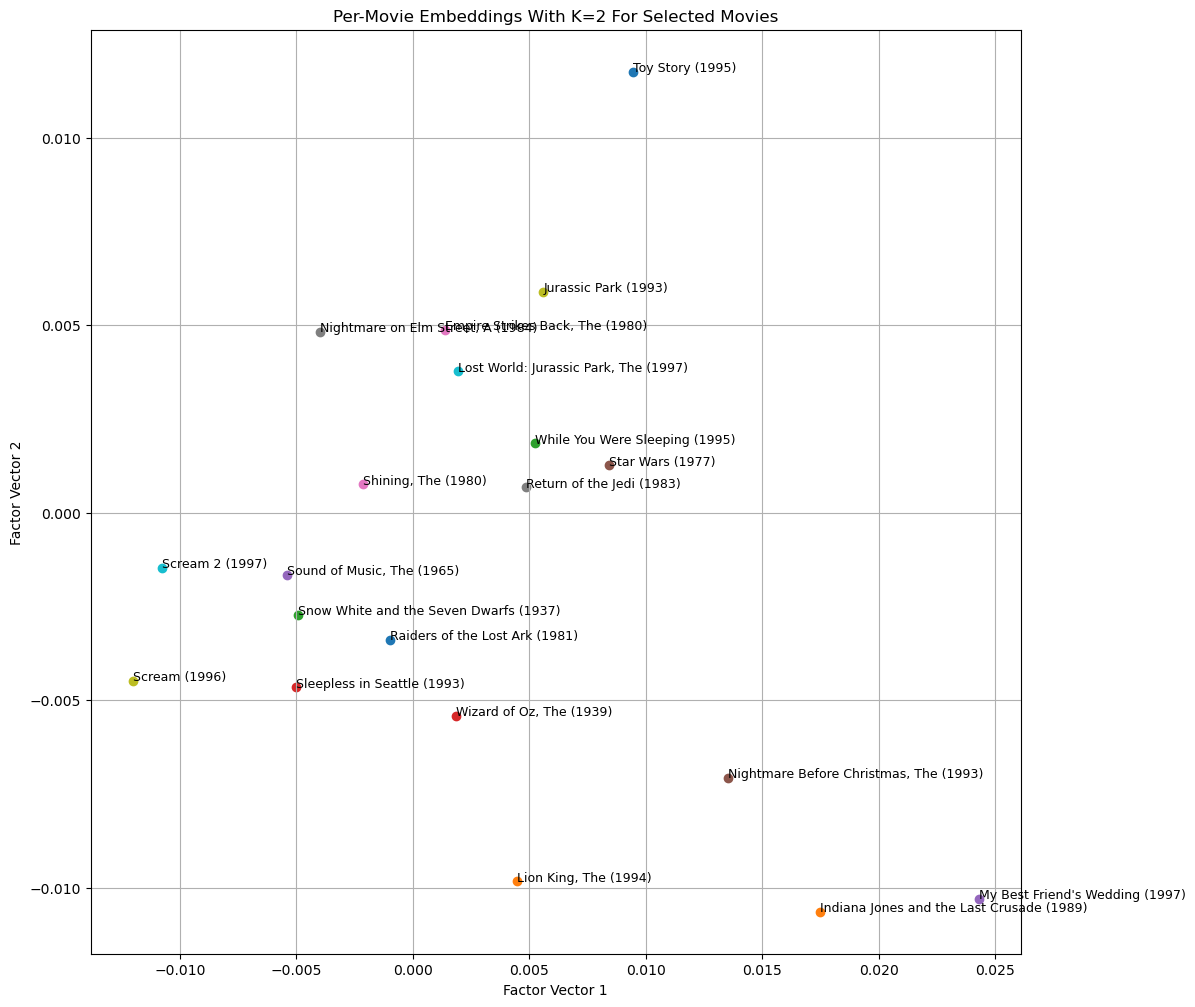

In [21]:
import pandas as pd
select_movies_df = pd.read_csv('../data_movie_lens_100k/select_movies.csv')

factor_vectors = model.param_dict["V"][select_movies_df['item_id'].values - 1]
plt.figure(figsize=(12, 12))
for i, movie_id in enumerate(select_movies_df['item_id']):
    plt.scatter(factor_vectors[i, 0], factor_vectors[i, 1])
    plt.text(factor_vectors[i, 0], factor_vectors[i, 1], select_movies_df[select_movies_df['item_id'] == movie_id]['title'].values[0],
             fontsize=9)

plt.xlabel('Factor Vector 1')
plt.ylabel('Factor Vector 2')
plt.title('Per-Movie Embeddings With K=2 For Selected Movies')
plt.grid(True)
plt.show()